# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


---
## Step 0: Load The Data

In [17]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data\\train.p'
validation_file= 'traffic-signs-data\\valid.p'
testing_file = 'traffic-signs-data\\test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

In [18]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

#from numpy import unique
import numpy as np

# Number of training examples
print("Number of training examples =", len(X_train))

# Number of validation examples
print("Number of validation examples =", len(X_valid))

# Number of testing examples.
print("Number of testing examples =", len(X_test))

# What's the shape of an traffic sign image?
print("Image data shape =", X_test[0].shape)

# How many unique classes/labels there are in the dataset.
print("Number of classes =", len(np.unique(y_train)))

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

image label is: 22
type : uint8  min:  24  max: 233


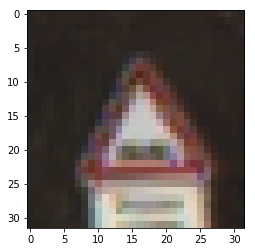

In [19]:
### Data exploration visualization code goes here. Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import random
%matplotlib inline

i  = random.randint(0, len(X_train))
image = X_train[i].squeeze()
image = np.array(image)
plt.imshow(image)
print ('image label is:', y_train[i])
print("type :", image.dtype, " min: ", np.min(image), " max:",np.max(image))

<Container object of 43 artists>

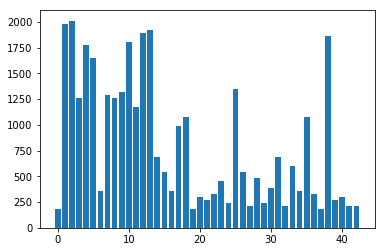

In [20]:
# visualize the number of pictures for each classes 
points = []

for i in range(43):
    points.append(np.sum(y_train == i))

plt.bar(range(43), points)

----

## Step 2: Design and Test a Model Architecture

This step is done using lenet.


##### Pre-process the Data Set:
Normalized data is easyer to process. Also, the images I found on the web had values between 1 and 0. 

 input size: (32, 32, 3) 0.188235294118 0.462745098039 0.854901960784  type: float64


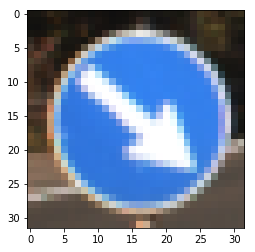

In [21]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc. Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

def normalize(image_set):
    """
    takes the dataset as inputs and outputs a set of normalized images.
    """
    op = []
    for img in image_set:
        img = np.array(img).astype('float')

        for x in range (32):
            for y in range(32):
                img[x, y, 0] /= 255
                img[x, y, 1] /= 255
                img[x, y, 2] /= 255

        op.append(img)
                
    return op

X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

image = X_train[i]
plt.imshow(image)

print(" input size:", image.shape, image[24,10,0], image[24,10,1], image[24,10,2], " type:", image.dtype)

### Model Architecture


In [22]:
### Define your architecture here. Feel free to use as many code cells as needed.

# taken from LeNet lab
import tensorflow as tf

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1w = tf.Variable(tf.truncated_normal(shape = (5, 5, 3, 6), mean = mu, stddev = sigma)) #Hf = Wf = 5, s = 3, valid_P
    conv1b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1w, strides = [1, 1, 1, 1], padding = 'VALID') + conv1b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID') #Hf = Wf = 2, s = 2, valid_P

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2w = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2w, strides = [1, 1, 1, 1], padding ='VALID') + conv2b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    f = tf.contrib.layers.flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1w = tf.Variable(tf.truncated_normal(shape = (400, 120), stddev = sigma, mean = mu))
    fc1b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(f, fc1w) + fc1b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2w = tf.Variable(tf.truncated_normal(shape = (120, 84), stddev = sigma, mean = mu))
    fc2b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2w) + fc2b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3w = tf.Variable(tf.truncated_normal(shape = (84, 43), stddev = sigma, mean = mu))
    fc3b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3w) + fc3b
    
    return logits

### Train, Validate and Test the Model


In [7]:
### Train your model here. Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, the accuracy on the test set should be calculated and reported as well.

# x is a placeholder for inputs, y is a placeholder for labels

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [8]:
# Create a training pipeline that uses the model to classify the data

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
training_operation = optimizer.minimize(loss_operation)

In [9]:
# Evaluate how well the loss and accuracy of the model for a given dataset.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        
    return total_accuracy / num_examples

Training...
EPOCH 1 ...
Tr.  Acc. = 0.81178 Tr.  Loss = 0.18822
Val. Acc. = 0.74467 Val. Loss = 0.25533
EPOCH 2 ...
Tr.  Acc. = 0.89390 Tr.  Loss = 0.10610
Val. Acc. = 0.79637 Val. Loss = 0.20363
EPOCH 3 ...
Tr.  Acc. = 0.95181 Tr.  Loss = 0.04819
Val. Acc. = 0.85442 Val. Loss = 0.14558
EPOCH 4 ...
Tr.  Acc. = 0.96132 Tr.  Loss = 0.03868
Val. Acc. = 0.85215 Val. Loss = 0.14785
EPOCH 5 ...
Tr.  Acc. = 0.97692 Tr.  Loss = 0.02308
Val. Acc. = 0.89705 Val. Loss = 0.10295
EPOCH 6 ...
Tr.  Acc. = 0.98000 Tr.  Loss = 0.02000
Val. Acc. = 0.88005 Val. Loss = 0.11995
EPOCH 7 ...
Tr.  Acc. = 0.98359 Tr.  Loss = 0.01641
Val. Acc. = 0.87687 Val. Loss = 0.12313
EPOCH 8 ...
Tr.  Acc. = 0.98198 Tr.  Loss = 0.01802
Val. Acc. = 0.86463 Val. Loss = 0.13537
EPOCH 9 ...
Tr.  Acc. = 0.98894 Tr.  Loss = 0.01106
Val. Acc. = 0.89501 Val. Loss = 0.10499
EPOCH 10 ...
Tr.  Acc. = 0.99069 Tr.  Loss = 0.00931
Val. Acc. = 0.89025 Val. Loss = 0.10975
EPOCH 11 ...
Tr.  Acc. = 0.99448 Tr.  Loss = 0.00552
Val. Acc. = 0.

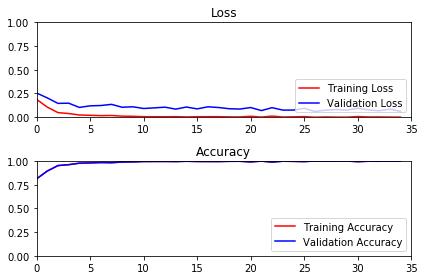

Model saved


In [11]:
# train the model

EPOCHS = 35
BATCH_SIZE = 256

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    train_accuracy_list = []
    valid_accuracy_list = []
    train_loss_list = []
    valid_loss_list = []
    
    print("Training...")
    
    for i in range(EPOCHS):
        
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        train_accuracy = evaluate(X_train, y_train)
        train_loss = 1.0 - train_accuracy
        train_loss_list.append(train_loss)
        train_accuracy_list.append(train_accuracy)
           
        valid_accuracy = evaluate(X_valid, y_valid)
        valid_loss = 1.0 - valid_accuracy
        valid_loss_list.append(valid_loss)
        valid_accuracy_list.append(train_accuracy)

        print("EPOCH {} ...".format(i+1))
        print("Tr.  Acc. = {:.5f}".format(train_accuracy), "Tr.  Loss = {:.5f}".format(train_loss))
        print("Val. Acc. = {:.5f}".format(valid_accuracy), "Val. Loss = {:.5f}".format(valid_loss))
 
    plot_accuracy = plt.subplot(2,1,2)
    plot_accuracy.set_title('Accuracy')
    plot_accuracy.plot(train_accuracy_list,'r', label='Training Accuracy')
    plot_accuracy.plot(valid_accuracy_list, 'b', label='Validation Accuracy')
    plot_accuracy.set_ylim([0, 1.0])
    plot_accuracy.set_xlim([0, EPOCHS])
    plot_accuracy.legend(loc=4)
    
    plot_loss = plt.subplot(2,1,1)
    plot_loss.set_title('Loss')
    plot_loss.plot(train_loss_list, 'r', label='Training Loss')
    plot_loss.plot(valid_loss_list, 'b', label='Validation Loss')
    plot_loss.set_ylim([0, 1.0])
    plot_loss.set_xlim([0, EPOCHS])
    plot_loss.legend(loc=4)
    plot_loss = plt.subplot(2,1,1)
    
    plt.tight_layout()
    plt.show()
        
    saver.save(sess, './TSC')
    print("Model saved")

In [12]:
# testing the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy =  {0:.5f}".format(test_accuracy))

Test Accuracy =  0.92629


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

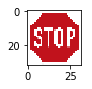

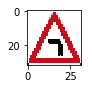

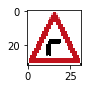

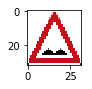

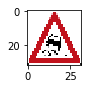

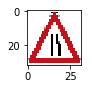

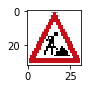

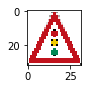

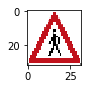

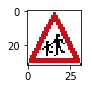

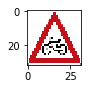

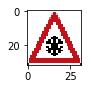

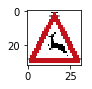

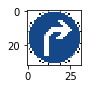

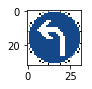

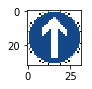

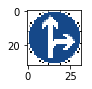

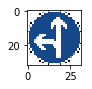

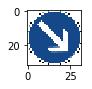

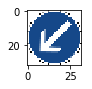

input size:  (32, 32, 3) type :  float32 min:  0.0705882 max:  1.0


In [14]:
### Load the images and plot them here.
from os import listdir
from cv2 import resize
import matplotlib.image as mpimg

def loadImages():
    """ return array of images"""
    
    floder = 'new_signs\\'
    imagesList = listdir(floder)
    loadedImages = []
    
    for image in imagesList:
        
        img = mpimg.imread(floder + image)
        img = np.array(img)
        
        img = resize(img, (32, 32))
        img = img[:, :, :3]
        
        plt.figure(figsize = (1, 1))
        plt.imshow(img)
        plt.show()
        loadedImages.append(img)

    return loadedImages

# images in an array
X_my_test = loadImages()

# visualizing the new images
print("input size: ", X_my_test[0].shape, "type : ", X_my_test[0].dtype, "min: ", np.min(X_my_test[0]),\
      "max: ",np.max(X_my_test[0]))

# correct labels
Y_my_test = [14, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39]

#### Predict the Sign Type for Each Image

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
with tf.Session() as sess:
    saver.restore(sess, './TSC')

    test_accuracy = evaluate(X_my_test, Y_my_test)
    
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Test Accuracy  {0:.5f}".format(test_accuracy))

Test Accuracy  0.80000


#### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [16]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    out = sess.run(tf.nn.softmax(logits), feed_dict={x: X_my_test}) #, keep_prob: 1.0})
    prediction = sess.run(tf.nn.top_k(out, k = 5))

print("The actual values of the five input images are\n", Y_my_test)
print("the top 5 detected labels are\n", prediction.indices[:20,:])

np.set_printoptions(formatter={'float': lambda x: "{0:.5f}".format(x)})
print("Softmax probabilities for the 20 images are \n", prediction.values[:20,:])

The actual values of the five input images are
 [14, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39]
the top 5 detected labels are
 [[29 14  1 25  2]
 [19 23 31 28 25]
 [20 23  9 41 28]
 [22 29 25 24 18]
 [23 19 20 11  0]
 [24 18 21 29 26]
 [25 22 20  0  1]
 [18 26 11 21 24]
 [18 27 24 26 21]
 [28 19  0 11 20]
 [29 23 31 28 24]
 [28 30 11 23 26]
 [31 21 11 18 25]
 [33 13 11  7 26]
 [34 38 15 13  9]
 [35 20 40 19  9]
 [36 40 18 11  9]
 [37 40  4 39  0]
 [38 36 13  0  1]
 [39  2  7 31 40]]
Softmax probabilities for the 20 images are 
 [[1.00000 0.00000 0.00000 0.00000 0.00000]
 [0.99997 0.00003 0.00000 0.00000 0.00000]
 [1.00000 0.00000 0.00000 0.00000 0.00000]
 [1.00000 0.00000 0.00000 0.00000 0.00000]
 [1.00000 0.00000 0.00000 0.00000 0.00000]
 [1.00000 0.00000 0.00000 0.00000 0.00000]
 [1.00000 0.00000 0.00000 0.00000 0.00000]
 [0.99947 0.00053 0.00000 0.00000 0.00000]
 [0.99608 0.00392 0.00000 0.00000 0.00000]
 [1.00000 0.00000 0.00000 0.00000 0.00000]
 [1